In [265]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from category_encoders import OrdinalEncoder 

In [266]:
data = pd.read_csv('Dataset Karyawan.csv')
data


,Level,LamaBekerja,PendidikanTerakhir,Sanksi,Kinerja,Loyalitas,HAV,Konfirmasi Atasan,Bonus
0,19,318,S1,Tidak Aktif,3.92,3.62,1,1,Tidak Layak
1,17,314,S1,Tidak Aktif,3.86,2.85,1,1,Layak
2,18,256,S1,Tidak Aktif,3.92,3.31,1,1,Layak
3,18,224,S1,Tidak Aktif,3.82,3.92,1,1,Layak
4,16,221,S1,Tidak Aktif,3.81,3.69,2,1,Layak
...,...,...,...,...,...,...,...,...,...
7960,13,0,S1,Tidak Aktif,0.00,0.00,9,9,Tidak Layak
7961,12,0,S1,Tidak Aktif,0.00,0.00,9,9,Tidak Layak
7962,11,0,S1,Tidak Aktif,0.00,0.00,9,9,Tidak Layak
7963,12,0,S1,Tidak Aktif,0.00,0.00,9,9,Tidak Layak


In [267]:
data.shape

(7965, 9)

In [268]:
#preprocessing data
#missing value
nan_data = data[data.isna().any(axis=1)]
nan_data


,Level,LamaBekerja,PendidikanTerakhir,Sanksi,Kinerja,Loyalitas,HAV,Konfirmasi Atasan,Bonus
46,11,91,NaN,Tidak Aktif,4.51,3.54,1,1,Layak
1081,13,18,NaN,Tidak Aktif,3.78,0.00,3,3,Tidak Layak
1393,11,159,NaN,Tidak Aktif,4.18,2.23,4,4,Tidak Layak
1679,12,125,NaN,Tidak Aktif,3.94,3.00,4,4,Tidak Layak
2077,11,98,NaN,Tidak Aktif,4.18,3.92,4,4,Tidak Layak
2518,12,73,NaN,Tidak Aktif,3.05,3.00,4,4,Tidak Layak
2830,11,58,NaN,Tidak Aktif,4.48,3.38,4,4,Tidak Layak
3168,12,48,NaN,Tidak Aktif,4.47,3.00,4,4,Tidak Layak
3384,12,24,NaN,Tidak Aktif,4.32,3.38,4,4,Tidak Layak
3542,13,12,NaN,Tidak Aktif,3.60,0.00,8,4,Tidak Layak


In [269]:
len(nan_data)

16

In [270]:
data =  data.dropna()
data.shape

(7949, 9)

In [ ]:
#transformasi data
data = data.apply(lambda x: x.str.strip().str.title() if x.dtype == 'object' else x)
maplist = [
    {'col': 'PendidikanTerakhir', 'mapping': {'SD': 0, 'SMP': 1,'SMA': 2, 'SMK': 3, 
                                              'D1': 4, 'D2': 5, 'D3': 6,'D4': 7, 'S1': 8, 'S2': 9}},
    {'col': 'Sanksi', 'mapping': {'Tidak Aktif' : 0, 'Aktif': 1}}
]
oe = OrdinalEncoder(mapping=maplist)
data = oe.fit_transform(data)
data


,Level,LamaBekerja,PendidikanTerakhir,Sanksi,Kinerja,Loyalitas,HAV,Konfirmasi Atasan,Bonus
0,19,318,8.0,0,3.92,3.62,1,1,Tidak Layak
1,17,314,8.0,0,3.86,2.85,1,1,Layak
2,18,256,8.0,0,3.92,3.31,1,1,Layak
3,18,224,8.0,0,3.82,3.92,1,1,Layak
4,16,221,8.0,0,3.81,3.69,2,1,Layak
...,...,...,...,...,...,...,...,...,...
7960,13,0,8.0,0,0.00,0.00,9,9,Tidak Layak
7961,12,0,8.0,0,0.00,0.00,9,9,Tidak Layak
7962,11,0,8.0,0,0.00,0.00,9,9,Tidak Layak
7963,12,0,8.0,0,0.00,0.00,9,9,Tidak Layak


In [274]:
#memisahkan fitur dan label
x = data.drop(columns=' Bonus ', axis=1)
y = data[' Bonus ']

x

,Level,LamaBekerja,PendidikanTerakhir,Sanksi,Kinerja,Loyalitas,HAV,Konfirmasi Atasan
0,19,318,8.0,0,3.92,3.62,1,1
1,17,314,8.0,0,3.86,2.85,1,1
2,18,256,8.0,0,3.92,3.31,1,1
3,18,224,8.0,0,3.82,3.92,1,1
4,16,221,8.0,0,3.81,3.69,2,1
...,...,...,...,...,...,...,...,...
7960,13,0,8.0,0,0.00,0.00,9,9
7961,12,0,8.0,0,0.00,0.00,9,9
7962,11,0,8.0,0,0.00,0.00,9,9
7963,12,0,8.0,0,0.00,0.00,9,9


In [275]:
#standarisasi data
kolom = [col for col in x.columns]
skala = MinMaxScaler()
scaled = skala.fit_transform(x)
df = pd.DataFrame(scaled,columns=kolom) 
df

,Level,LamaBekerja,PendidikanTerakhir,Sanksi,Kinerja,Loyalitas,HAV,Konfirmasi Atasan
0,1.000000,0.634731,1.0,0.0,0.784,0.9050,0.000,0.0
1,0.777778,0.626747,1.0,0.0,0.772,0.7125,0.000,0.0
2,0.888889,0.510978,1.0,0.0,0.784,0.8275,0.000,0.0
3,0.888889,0.447106,1.0,0.0,0.764,0.9800,0.000,0.0
4,0.666667,0.441118,1.0,0.0,0.762,0.9225,0.125,0.0
...,...,...,...,...,...,...,...,...
7944,0.333333,0.000000,1.0,0.0,0.000,0.0000,1.000,1.0
7945,0.222222,0.000000,1.0,0.0,0.000,0.0000,1.000,1.0
7946,0.111111,0.000000,1.0,0.0,0.000,0.0000,1.000,1.0
7947,0.222222,0.000000,1.0,0.0,0.000,0.0000,1.000,1.0


 Bonus 
Tidak Layak    7595
Layak           354
Name: count, dtype: int64


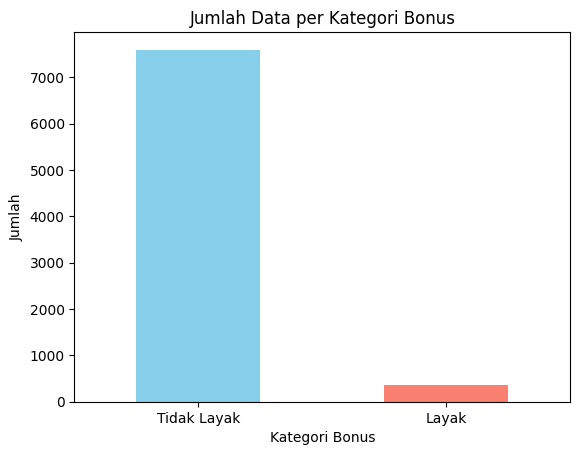

In [276]:
print(y.value_counts())
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Jumlah Data per Kategori Bonus')
plt.xlabel('Kategori Bonus')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [277]:
#sebelum di smote
print(x.shape)
print(y.shape)

(7949, 8)
(7949,)


In [278]:
#sampling smote
sm = SMOTE(random_state=30)
x, y = sm.fit_resample(x,y)
print(x_sampling.shape)
print(y_sampling.shape)

(15190, 8)
(15190,)


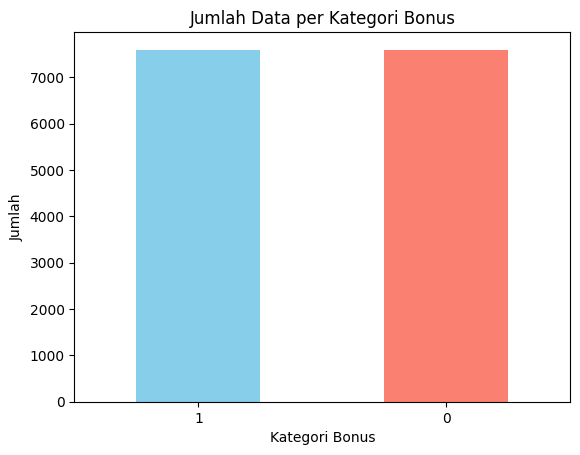

In [279]:
y_sampling.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Jumlah Data per Kategori Bonus')
plt.xlabel('Kategori Bonus')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [280]:
#memisahkan data latih dan data uji
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(15190, 8) (12152, 8) (3038, 8)


In [281]:
#k-nn
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean').fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [282]:
#Prediksi dan evaluasi model
x_train_pred = knn.predict(x_train)
train_acc = accuracy_score(x_train_pred, y_train)
print('Akurasi data latih = ', train_acc)

x_test_pred = knn.predict(x_test)
test_acc = accuracy_score(x_test_pred, y_test)
print('Akurasi data uji = ', test_acc)
print(classification_report(y_test, x_test_pred))

Akurasi data latih =  0.9692231731402239
Akurasi data uji =  0.9591836734693877
              precision    recall  f1-score   support

       Layak       0.93      1.00      0.96      1519
 Tidak Layak       1.00      0.92      0.96      1519

    accuracy                           0.96      3038
   macro avg       0.96      0.96      0.96      3038
weighted avg       0.96      0.96      0.96      3038



In [ ]:
#model prediksi
input_data = [11, 76,'smk', 'Tidak Aktif', 4.54, 3.77, 1, 1]
#transformasi data
data = pd.DataFrame([input_data], columns=['Level', 'LamaBekerja', 'PendidikanTerakhir', 'Sanksi', 
                                           'Kinerja', 'Loyalitas', 'HAV', 'KonfirmasiAtasan'])

# Transformasi: rapihin string
data = data.apply(lambda x: x.str.strip().str.title() if x.dtype == 'object' else x)
maplist = [
    {'col': 'PendidikanTerakhir', 'mapping': {'SD': 0, 'SMP': 1,'SMA': 2, 'SMK': 3, 'D1': 4, 'D2': 5, 'D3': 6,'D4': 7, 'S1': 8, 'S2': 9}},
    {'col': 'Sanksi', 'mapping': {'Tidak Aktif' : 0, 'Aktif': 1}}
]
oe = OrdinalEncoder(mapping=maplist)
data = oe.fit_transform(data)
data


,Level,LamaBekerja,PendidikanTerakhir,Sanksi,Kinerja,Loyalitas,HAV,KonfirmasiAtasan
0,11,76,-1.0,0,4.54,3.77,1,1


In [319]:
data = np.array(data)
data = data.reshape(1, -1)

In [320]:
#standarisasi data
std_data = skala.transform(data)
std_data

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.11111111, 0.15169661, 0.        , 0.        , 0.908     ,
        0.9425    , 0.        , 0.        ]])

In [321]:
prediksi = knn.predict(std_data)
print(prediksi)

if (prediksi[0] == 0):
    print('Karyawan Tersebut LAYAK MENDAPATKAN Bonus Tahunan')
else :
    print('Karyawan Tersebut TIDAK LAYAK MENDAPATKAN Bonus Tahunan')

['Tidak Layak']
Karyawan Tersebut TIDAK LAYAK MENDAPATKAN Bonus Tahunan


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
